In [4]:
def calculate_table(df, season, output_dir):
    from collections import defaultdict
    import os
        
    team_dict = defaultdict(lambda:0)
    team_table = defaultdict(lambda:defaultdict(lambda:0))

    for i in range(len(df)):

        if df.iloc[i]["visitante"] == df.iloc[i]["vencedor"] or df.iloc[i]["mandante"] == df.iloc[i]["vencedor"]:
            team_dict[df.iloc[i]["vencedor"]] += 3
            if df.iloc[i]["mandante"] == df.iloc[i]["vencedor"]:
                team_table[df.iloc[i]["vencedor"]]["Home_Vict"] += 1
                team_table[df.iloc[i]["visitante"]]["Away_Loss"] += 1
            else:
                team_table[df.iloc[i]["vencedor"]]["Away_Vict"] += 1
                team_table[df.iloc[i]["mandante"]]["Home_Loss"] += 1
        else:
            team_dict[df.iloc[i]["visitante"]] += 1
            team_dict[df.iloc[i]["mandante"]] += 1
            team_table[df.iloc[i]["mandante"]]["Home_Draw"] += 1
            team_table[df.iloc[i]["visitante"]]["Away_Draw"] += 1
            
        
    sorted_teams = sorted(team_dict, key=lambda k: team_dict[k], reverse=True)
    
    os.makedirs(os.path.join(output_dir,str(season)), exist_ok=True)
    
    f = open(os.path.join(os.path.join(output_dir,str(season)),str(season)+"_table.csv"), "w")
    f.write("Team,Home_Vict,Home_Draw,Home_Loss,Away_Vict,Away_Draw,Away_Loss\n")
    for t in sorted_teams:
        f.write(",".join([t] + [str(team_table[t][s]) for s in "Home_Vict,Home_Draw,Home_Loss,Away_Vict,Away_Draw,Away_Loss".split(",")]))
        f.write("\n")
    f.close()

    return sorted_teams, team_table


In [7]:
def create_season_heatmap(sorted_teams, df_season, season, output_dir):
    import numpy as np
    from pandas import DataFrame
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os

    %matplotlib inline

    os.makedirs(os.path.join(output_dir,str(season)), exist_ok=True)
    
    matrix_home = np.zeros((len(sorted_teams),len(sorted_teams)))
    matrix_vis = np.zeros((len(sorted_teams),len(sorted_teams)))

    for i in range(len(df_season)):
        
        vis_i = sorted_teams.index(df_season.iloc[i]["visitante"])
        home_i = sorted_teams.index(df_season.iloc[i]["mandante"])

        if df_season.iloc[i]["visitante"] == df_season.iloc[i]["vencedor"]:
            matrix_home[home_i,vis_i] -= 0
            matrix_vis[vis_i,home_i] += 3
        elif df_season.iloc[i]["mandante"] == df_season.iloc[i]["vencedor"]:
            matrix_home[home_i,vis_i] += 3
            matrix_vis[vis_i,home_i] -= 0
        else:
            matrix_home[home_i,vis_i] += 1
            matrix_vis[vis_i,home_i] += 1
            
            
    for t in sorted_teams:
        i = sorted_teams.index(t)
        matrix_home[i,i] = None
        matrix_vis[i,i] = None
            
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            
    df = DataFrame(matrix_home, index=sorted_teams, columns=sorted_teams)

    sns.heatmap(df, ax=axes[0], annot=True, cmap="magma")

    axes[0].set_xlabel("Away Team", fontsize=12)
    axes[0].set_ylabel("Home Team", fontsize=12)
    axes[0].set_title(f"Brasileirao {season} Matrix - Home Games")

    df = DataFrame(matrix_vis, index=sorted_teams, columns=sorted_teams)

    sns.heatmap(df, ax=axes[1], annot=True, cmap="magma")

    axes[1].set_xlabel("Away Team", fontsize=12)
    axes[1].set_ylabel("Home Team", fontsize=12)
    axes[1].set_title(f"Brasileirao {season} Matrix - Away Games")
    
    plt.tight_layout()
    plt.savefig(os.path.join(os.path.join(output_dir,str(season)),str(season)+"_home_and_away_games_heatmap.png"))
    plt.show()

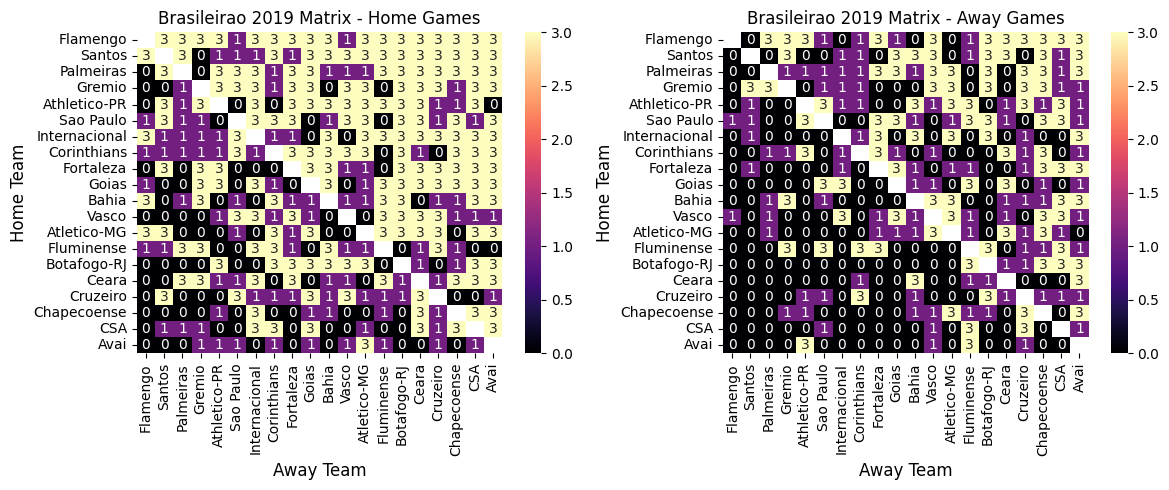

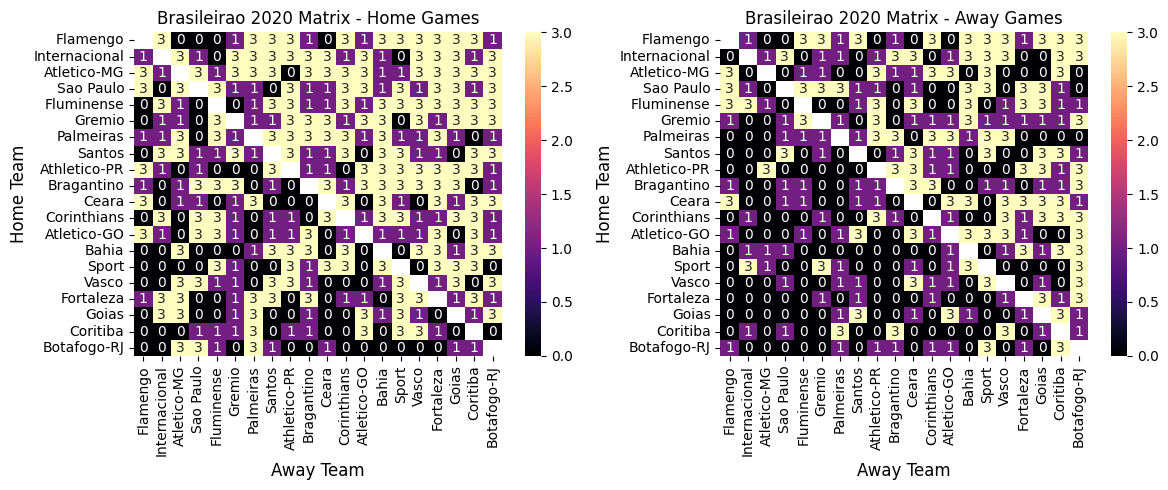

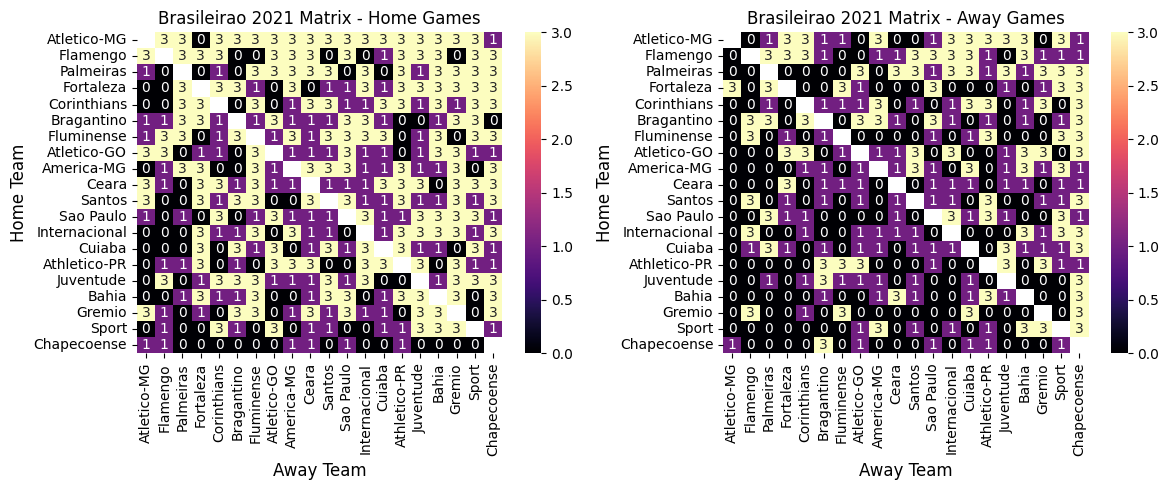

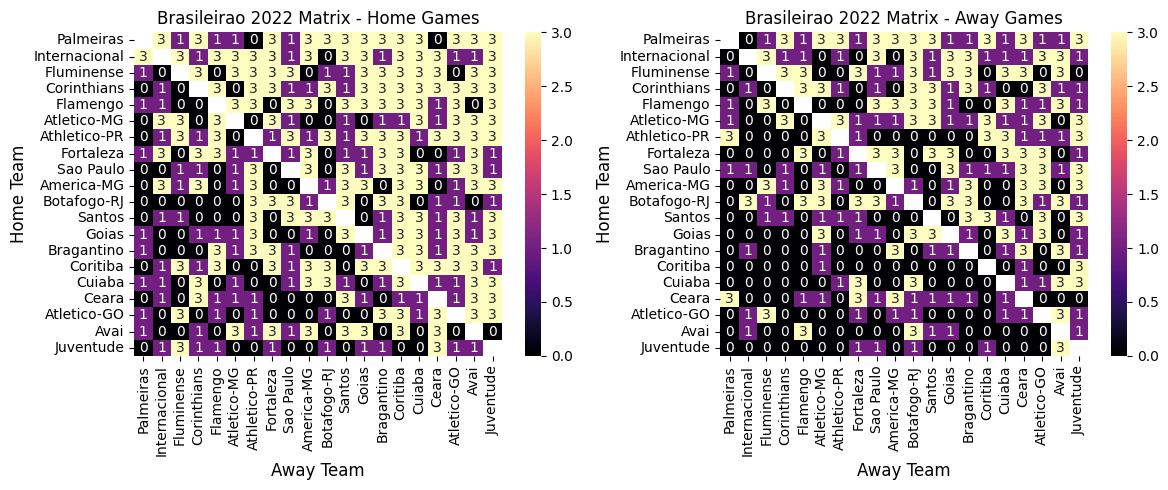

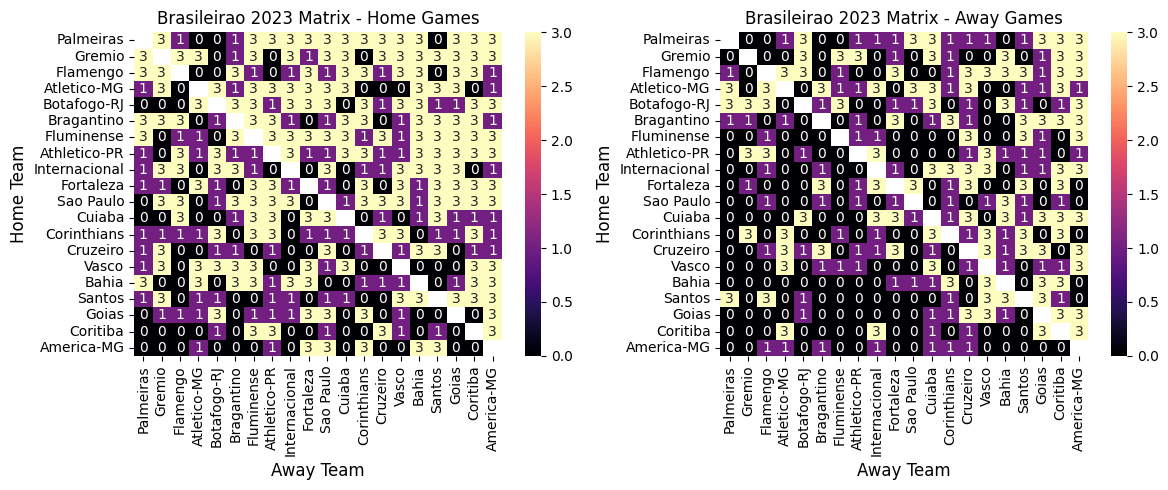

In [8]:
import pandas as pd

df = pd.read_csv('../campeonato-brasileiro-full.csv')
df['data'] = pd.to_datetime(df['data'], dayfirst=True)

for season in range(2019, 2024):
    
    if season == 2020:
        df_season = df[(df['data'] >= pd.Timestamp("2020-08-08")) & (df['data'] <= pd.Timestamp("2021-02-25"))]
    elif season == 2021:
        df_season = df[(df['data'] >= pd.Timestamp("2021-05-29")) & (df['data'] <= pd.Timestamp("2021-12-09"))]
    else:
        df_season = df[(df['data'] >= pd.Timestamp(f"{season}-01-01")) & (df['data'] <= pd.Timestamp(f"{season}-12-31"))]

    sorted_teams, _ = calculate_table(df_season, season, "C:\\Users\\jalfr\\OneDrive\\Desktop\\illini\\BRASA\\Code\\Illinois_Brasileirao_Analysis\\notebooks\\data")
    create_season_heatmap(sorted_teams, df_season, season, "C:\\Users\\jalfr\\OneDrive\\Desktop\\illini\\BRASA\\Code\\Illinois_Brasileirao_Analysis\\notebooks\\data")